First few rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked WikiId  \
0      0         A/5 21171   7.2500  ...        S  691.0   
1      0          PC 17599  71.2833  ...        C   90.0   
2      0  STON/O2. 3101282   7.9250  ...        S  865.0   
3      0            113803  53.1000  ...        S

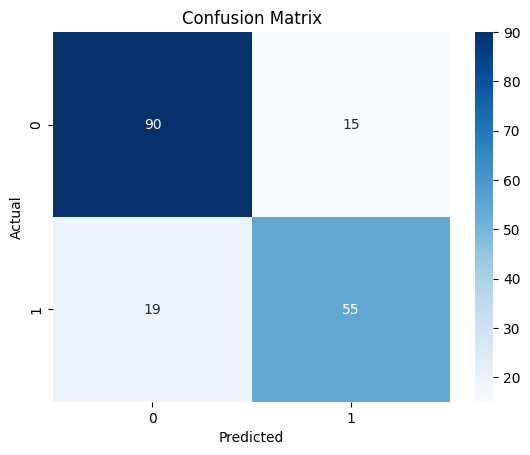


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Unseen Record Prediction: Not Survived


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  

# Load the dataset
data = pd.read_csv('full.csv')
print("First few rows of the dataset:")
print(data.head())

# Drop irrelevant features
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)

# Convert categorical variables into numerical representations
label_encoders = {}
for col in ['Sex', 'Embarked']:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))  
        label_encoders[col] = le

# Check missing values before handling
print("\nMissing values before handling:")
print(data.isnull().sum())

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')  
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])  

# Drop rows where target variable (y) is NaN
data.dropna(subset=['Survived'], inplace=True)

# Verify missing values again
print("\nMissing values after handling:")
print(data.isnull().sum())

# Selecting features and target
target = 'Survived'
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data[target]

# Ensure X and y have the same number of samples
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Splitting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Checking an unseen record (Example: Third-class male, age 25, no relatives, low fare)
sample_record = np.array([[3, 1, 25, 0, 0, 7.25, 2]])  
prediction = model.predict(sample_record)
print("\nUnseen Record Prediction:", "Survived" if prediction[0] == 1 else "Not Survived")
